In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mayanaelokrenanti","key":"09f9c15b1930c08a969e2ac65a615970"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pratik2901/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/91.4M [00:00<?, ?B/s]
100% 91.4M/91.4M [00:00<00:00, 1.39GB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("/content/multiclass-weather-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
!ls /content

 kaggle.json		        multiclass-weather-dataset.zip	 sunrise3.jpg
'Multi-class Weather Dataset'   sample_data


In [ ]:
!mv "/content/Multi-class Weather Dataset" "/content/multiclass-weather-dataset"

In [ ]:
base_dir = '/content/multiclass-weather-dataset'

In [ ]:
# Normalisasi gambar dan buat generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Train dan validation
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,868 (40.58 MB)

 Trainable params: 10,636,868 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - accuracy: 0.5724 - loss: 1.4561 - val_accuracy: 0.8482 - val_loss: 0.4643
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.8673 - loss: 0.4157 - val_accuracy: 0.8125 - val_loss: 0.5479
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8942 - loss: 0.3366 - val_accuracy: 0.7634 - val_loss: 0.6672
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.9216 - loss: 0.2247 - val_accuracy: 0.8348 - val_loss: 0.3896
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9334 - loss: 0.1719 - val_accuracy: 0.7812 - val_loss: 0.8706
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9263 - loss: 0.1829 - val_accuracy: 0.8393 - val_loss: 0.5341
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9785 - loss: 0.0687 - val_accuracy: 0.8705 - val_loss: 0.3382
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9956 - loss: 0.0328 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


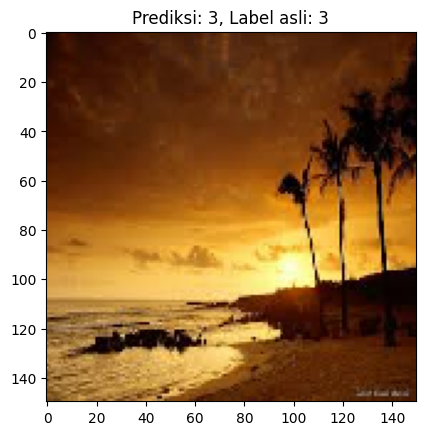

In [ ]:
# Contoh: ambil 1 batch dan prediksi
images, labels = next(val_data)
predictions = model.predict(images)

# Tampilkan hasil pertama
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.title(f"Prediksi: {np.argmax(predictions[0])}, Label asli: {np.argmax(labels[0])}")
plt.show()


In [ ]:
import os

base_dir = '/content/multiclass-weather-dataset'  # Ganti sesuai nama folder hasil ekstraksi kamu
print(os.listdir(base_dir))


['Rain', 'Sunrise', 'Shine', 'Cloudy']


In [ ]:
train_dir = '/content/multiclass-weather-dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% data akan jadi data validasi
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # karena ada 4 kelas cuaca
])


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.4164 - loss: 1.9569 - val_accuracy: 0.6920 - val_loss: 0.8335
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7647 - loss: 0.6361 - val_accuracy: 0.7634 - val_loss: 0.7435
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8544 - loss: 0.4551 - val_accuracy: 0.8125 - val_loss: 0.4476
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.8971 - loss: 0.2893 - val_accuracy: 0.8393 - val_loss: 0.3814
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9129 - loss: 0.2318 - val_accuracy: 0.8080 - val_loss: 0.5526
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9380 - loss: 0.2046 - val_accuracy: 0.8259 - val_loss: 0.5513
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9156 - loss: 0.2092 - val_accuracy: 0.8438 - val_loss: 0.5291
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9578 - loss: 0.1154 - val_accuracy: 0

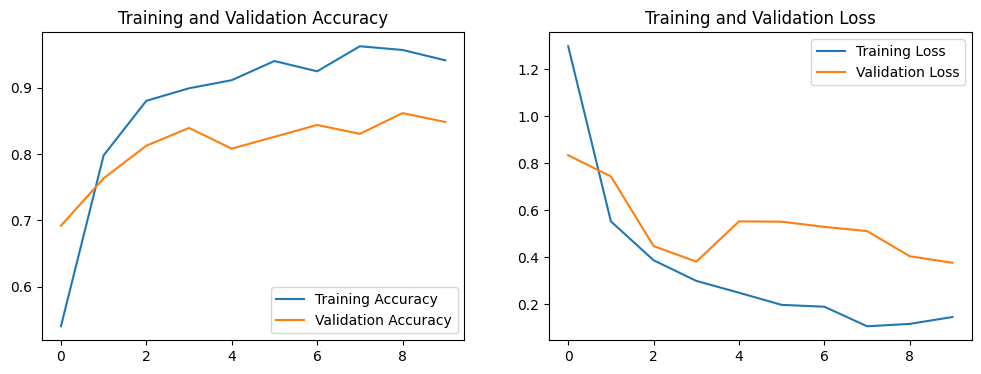

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8552 - loss: 0.3768
Validation Accuracy: 0.85


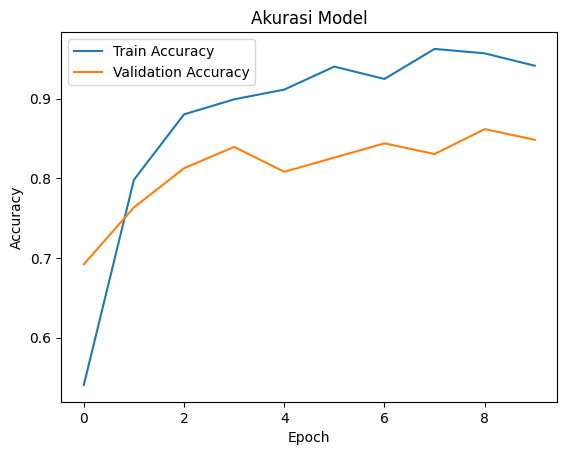

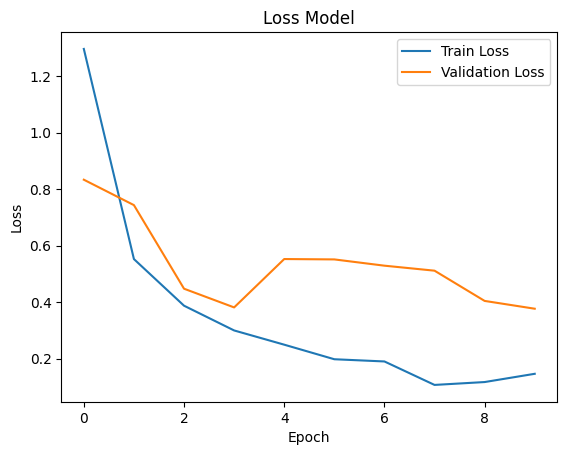

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("weather_classification_model.h5")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Nama kelas (pastikan urutannya sama seperti di folder dataset)
class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

# Ambil path gambar
img_path = '/content/multiclass-weather-dataset/Rain/rain1.jpg'

# Load dan preprocess gambar
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Prediksi
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print("Prediksi:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
Prediksi: Rain


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
# Prediksi data validasi
val_generator.reset()  # reset generator untuk prediksi berurutan
predictions = model.predict(val_generator, verbose=1)

# Ambil label prediksi dan label sebenarnya
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


In [ ]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.37      0.27      0.31        60
        Rain       0.21      0.26      0.23        43
       Shine       0.24      0.28      0.26        50
     Sunrise       0.29      0.28      0.29        71

    accuracy                           0.27       224
   macro avg       0.28      0.27      0.27       224
weighted avg       0.28      0.27      0.28       224



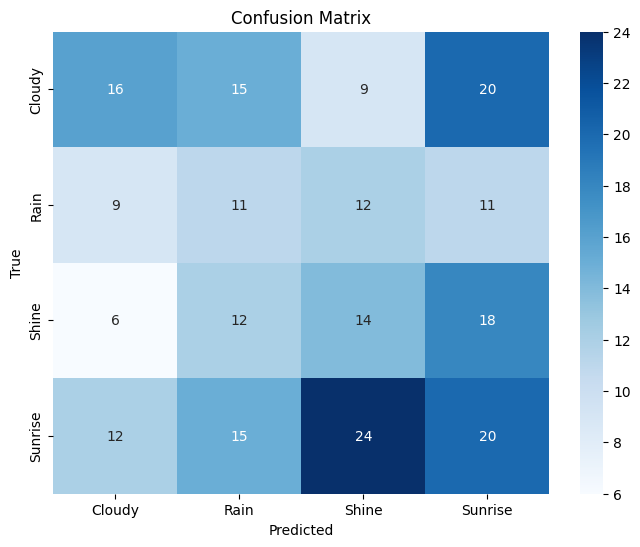

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Daftar kelas sesuai nama folder
class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

# 1. Ganti dengan path gambar yang kamu mau uji
img_path = '/content/multiclass-weather-dataset/Rain/rain101.jpg'

# 2. Load dan ubah ukuran gambar
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)

# 3. Tambahkan dimensi (karena model butuh batch)
img_array = np.expand_dims(img_array, axis=0)

# 4. Normalisasi
img_array /= 255.0

# 5. Prediksi
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# 6. Hasil
print("Gambar ini diprediksi sebagai:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Gambar ini diprediksi sebagai: Shine


In [ ]:
model.save("weather_classification_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("weather_classification_model.h5")

Saving sunrise101.jpg to sunrise101.jpg


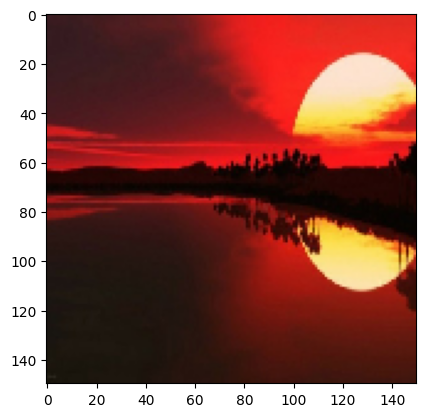

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

File: sunrise101.jpg
This image belongs to class: Sunrise


In [ ]:
import numpy as np
import keras
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array


uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    # Ubah target_size menjadi (150, 150) agar sesuai dengan ukuran saat pelatihan
    img = load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show() # Tambahkan ini untuk menampilkan gambar

    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    images = np.vstack([x])
    # batch_size doesn't affect the shape of the output for a single prediction
    classes = model.predict(images)

    # The train_generator object was used for training and contains class_indices
    # Need to access train_generator or train_data from previous cells
    # Assuming train_generator from the second training loop is available
    # If not, you might need to recreate it or store the class_indices
    # For this fix, we'll assume train_generator is still in memory from previous execution
    try:
        class_indices = train_generator.class_indices
    except NameError:
        # Fallback: If train_generator is not defined, define class_names manually
        print("Warning: train_generator not found. Using hardcoded class names.")
        class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
        class_list = dict(enumerate(class_names))


    if 'class_indices' in locals():
         class_list = {v: k for k, v in class_indices.items()}


    predicted_class_index = np.argmax(classes)

    print(f"\nFile: {fn}")
    if 'class_list' in locals():
        print(f"This image belongs to class: {class_list[predicted_class_index]}")
    else:
         print(f"This image belongs to class index: {predicted_class_index}")